# Notebook to view MLflow logs in notebook

created since loading large number of trials in MLflow UI is very slow & buggy

In [1]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import mlflow

%matplotlib inline

In [2]:
def create_color_map(df, column, cmap_name="Set3"):
    """
    Create a color map based on unique values in a specified column.

    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        column (str): Column name to base the color map on.
        cmap_name (str): Matplotlib colormap name.

    Returns:
        list: List of colors corresponding to each row.
        dict: Mapping of unique values to colors.
    """
    unique_vals = df[column].unique()
    cmap = plt.cm.get_cmap(cmap_name, len(unique_vals))
    color_map = {val: cmap(i) for i, val in enumerate(unique_vals)}
    colors = df[column].map(color_map).tolist()
    return colors, color_map


def plot_metrics(df, x, metrics, colors, figsize=(10, 6), dpi=300, width=0.6):
    """
    Plot multiple metrics in subplots with shared x-axis.

    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        x (array-like): X-axis values.
        metrics (list of dict): List containing metric configurations.
        colors (list): List of colors for the bars.
        figsize (tuple): Figure size.
        dpi (int): Dots per inch for the figure.
        width (float): Width of the bars.
    Returns:
        matplotlib.figure.Figure: The created figure.
        matplotlib.axes.Axes: The axes of the plot.
    """
    num_metrics = len(metrics)
    fig, axes = plt.subplots(num_metrics, 1, sharex=True, figsize=figsize, dpi=dpi)

    if num_metrics == 1:
        axes = [axes]

    for ax, metric in zip(axes, metrics):
        ax.bar(x, df[metric["column"]], width=width, color=colors, align="center")
        ax.set_title(metric["title"])
        ax.set_ylabel(metric["ylabel"])

    axes[-1].set_xlabel(metrics[-1].get("xlabel", "Trial"))

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make space for the legend
    return fig, axes


def add_legend(fig, color_map, title="Data Selection"):
    """
    Add a legend to the figure based on the color map.

    Parameters:
        fig (matplotlib.figure.Figure): The figure object.
        color_map (dict): Mapping of unique values to colors.
        title (str): Title for the legend.
    """
    handles = [
        mpatches.Patch(color=color, label=label) for label, color in color_map.items()
    ]
    # Place the legend outside the plot on the right
    fig.legend(
        handles=handles, title=title, loc="center left", bbox_to_anchor=(0.85, 0.5)
    )

In [3]:
######## USER INPUTS ########
log_folder_location = "x_from_euler/u1_rf_best_model_all_w_nest2/mlruns"
######## END USER INPUTS #####

In [4]:
mlflow.set_tracking_uri(log_folder_location)

all_runs = mlflow.search_runs(
    order_by=["metrics.rmse_val ASC"], search_all_experiments=True
)

In [5]:
cols_to_display = [
    "run_id",
    # metrics:
    "metrics.r2_val",
    "metrics.rmse_val",
    "metrics.r2_train",
    "metrics.rmse_train",
    # model:
    "params.n_estimators",
    "params.max_depth",
    "params.min_impurity_decrease",
    "params.min_samples_leaf",
    "params.min_samples_split",
    "params.min_weight_fraction_leaf",
    "params.bootstrap",
    "params.max_features",
    # data:
    "params.data_aggregation",
    "params.data_transform",
    "params.data_selection",
    "params.data_selection_t",
    "params.data_selection_i",
    "params.data_selection_q",
    "metrics.nb_features",
]

all_runs[cols_to_display].head(20)

,run_id,metrics.r2_val,metrics.rmse_val,metrics.r2_train,metrics.rmse_train,params.n_estimators,params.max_depth,params.min_impurity_decrease,params.min_samples_leaf,params.min_samples_split,params.min_weight_fraction_leaf,params.bootstrap,params.max_features,params.data_aggregation,params.data_transform,params.data_selection,params.data_selection_t,params.data_selection_i,params.data_selection_q,metrics.nb_features
0,8301937d87e642d7909612ecd8eb8b75,0.82573,2.629244,0.968599,1.008979,10000,None,0.4997868383562353,0.016908070991540847,0.08388337970534064,1.626647764184201e-05,False,0.2,None,None,variance_ith,None,15,None,90.0
1,944d3ea3b20843a78ea7ec0ce8c7e2cc,0.82573,2.629244,0.968599,1.008979,10000,None,0.49959148754797783,0.014261300121538,0.0644644288984737,0.0005946201025387665,False,log2,None,None,variance_ith,None,15,None,90.0
2,8d2e882585a540ac86853e10bac6fdd7,0.82573,2.629244,0.968599,1.008979,10000,None,0.4907173007901809,0.015321206294471493,0.06910684754998858,0.0006055488792605366,False,log2,None,None,variance_ith,None,15,None,90.0
3,6fc2f49d1ac84121a17b3ea2c0c69419,0.82573,2.629244,0.968599,1.008979,10000,None,0.4895913945541233,0.022259761447932163,0.07027350059078101,0.005284973769589262,False,log2,None,None,variance_ith,None,15,None,90.0
4,bf048104cb054d9fbbc48e29033ca4c9,0.82573,2.629244,0.968599,1.008979,10000,None,0.4911198936185464,0.02080298929759852,0.0707910017754774,0.005681566394539612,False,log2,None,None,variance_ith,None,15,None,90.0
5,aa1b1f6ad8834411b5feae7aff33dbd1,0.82573,2.629244,0.968599,1.008979,10000,None,0.4792725501007916,0.020966555028337816,0.07915014321295274,0.00033154354783038176,False,log2,None,None,variance_ith,None,15,None,90.0
6,6c74bfed9366480eb820a5fcb2ce0e70,0.82573,2.629244,0.968599,1.008979,10000,None,0.49092299109773607,0.015848277670109327,0.07999765182231605,0.00035600988553484436,False,log2,None,None,variance_ith,None,15,None,90.0
7,2de7985dad334f1ca30d157aa4d56980,0.82573,2.629244,0.968599,1.008979,10000,None,0.47949294050466335,0.01619193827992652,0.07138516411621634,1.7940064655490103e-05,False,log2,None,None,variance_ith,None,15,None,90.0
8,6e5ad69e565246689df6ba53a0ec82e0,0.82573,2.629244,0.968599,1.008979,10000,None,0.47787182093435604,0.013044193457144115,0.07837229167205376,0.0002773825737159537,False,log2,None,None,variance_ith,None,15,None,90.0
9,e0871b05b15e4b9994e5797a033b04b1,0.82573,2.629244,0.968599,1.008979,10000,None,0.4916472130853231,0.01618294489525351,0.0787505666862879,0.00035889131059455503,False,log2,None,None,variance_ith,None,15,None,90.0


## Display run insights

In [6]:
# order of run wrt sorted rmse_val
x_vals = [x + 1 for x in all_runs.index.tolist()]

# Define metrics to plot
metrics_to_plot = [
    {
        "column": "metrics.r2_val",
        "title": "R2 Validation Sorted",
        "ylabel": "R2 Val",
        "xlabel": "Trial",
    },
    {
        "column": "metrics.rmse_val",
        "title": "RMSE Validation Sorted",
        "ylabel": "RMSE Val",
    },
]

### Plot metrics overall

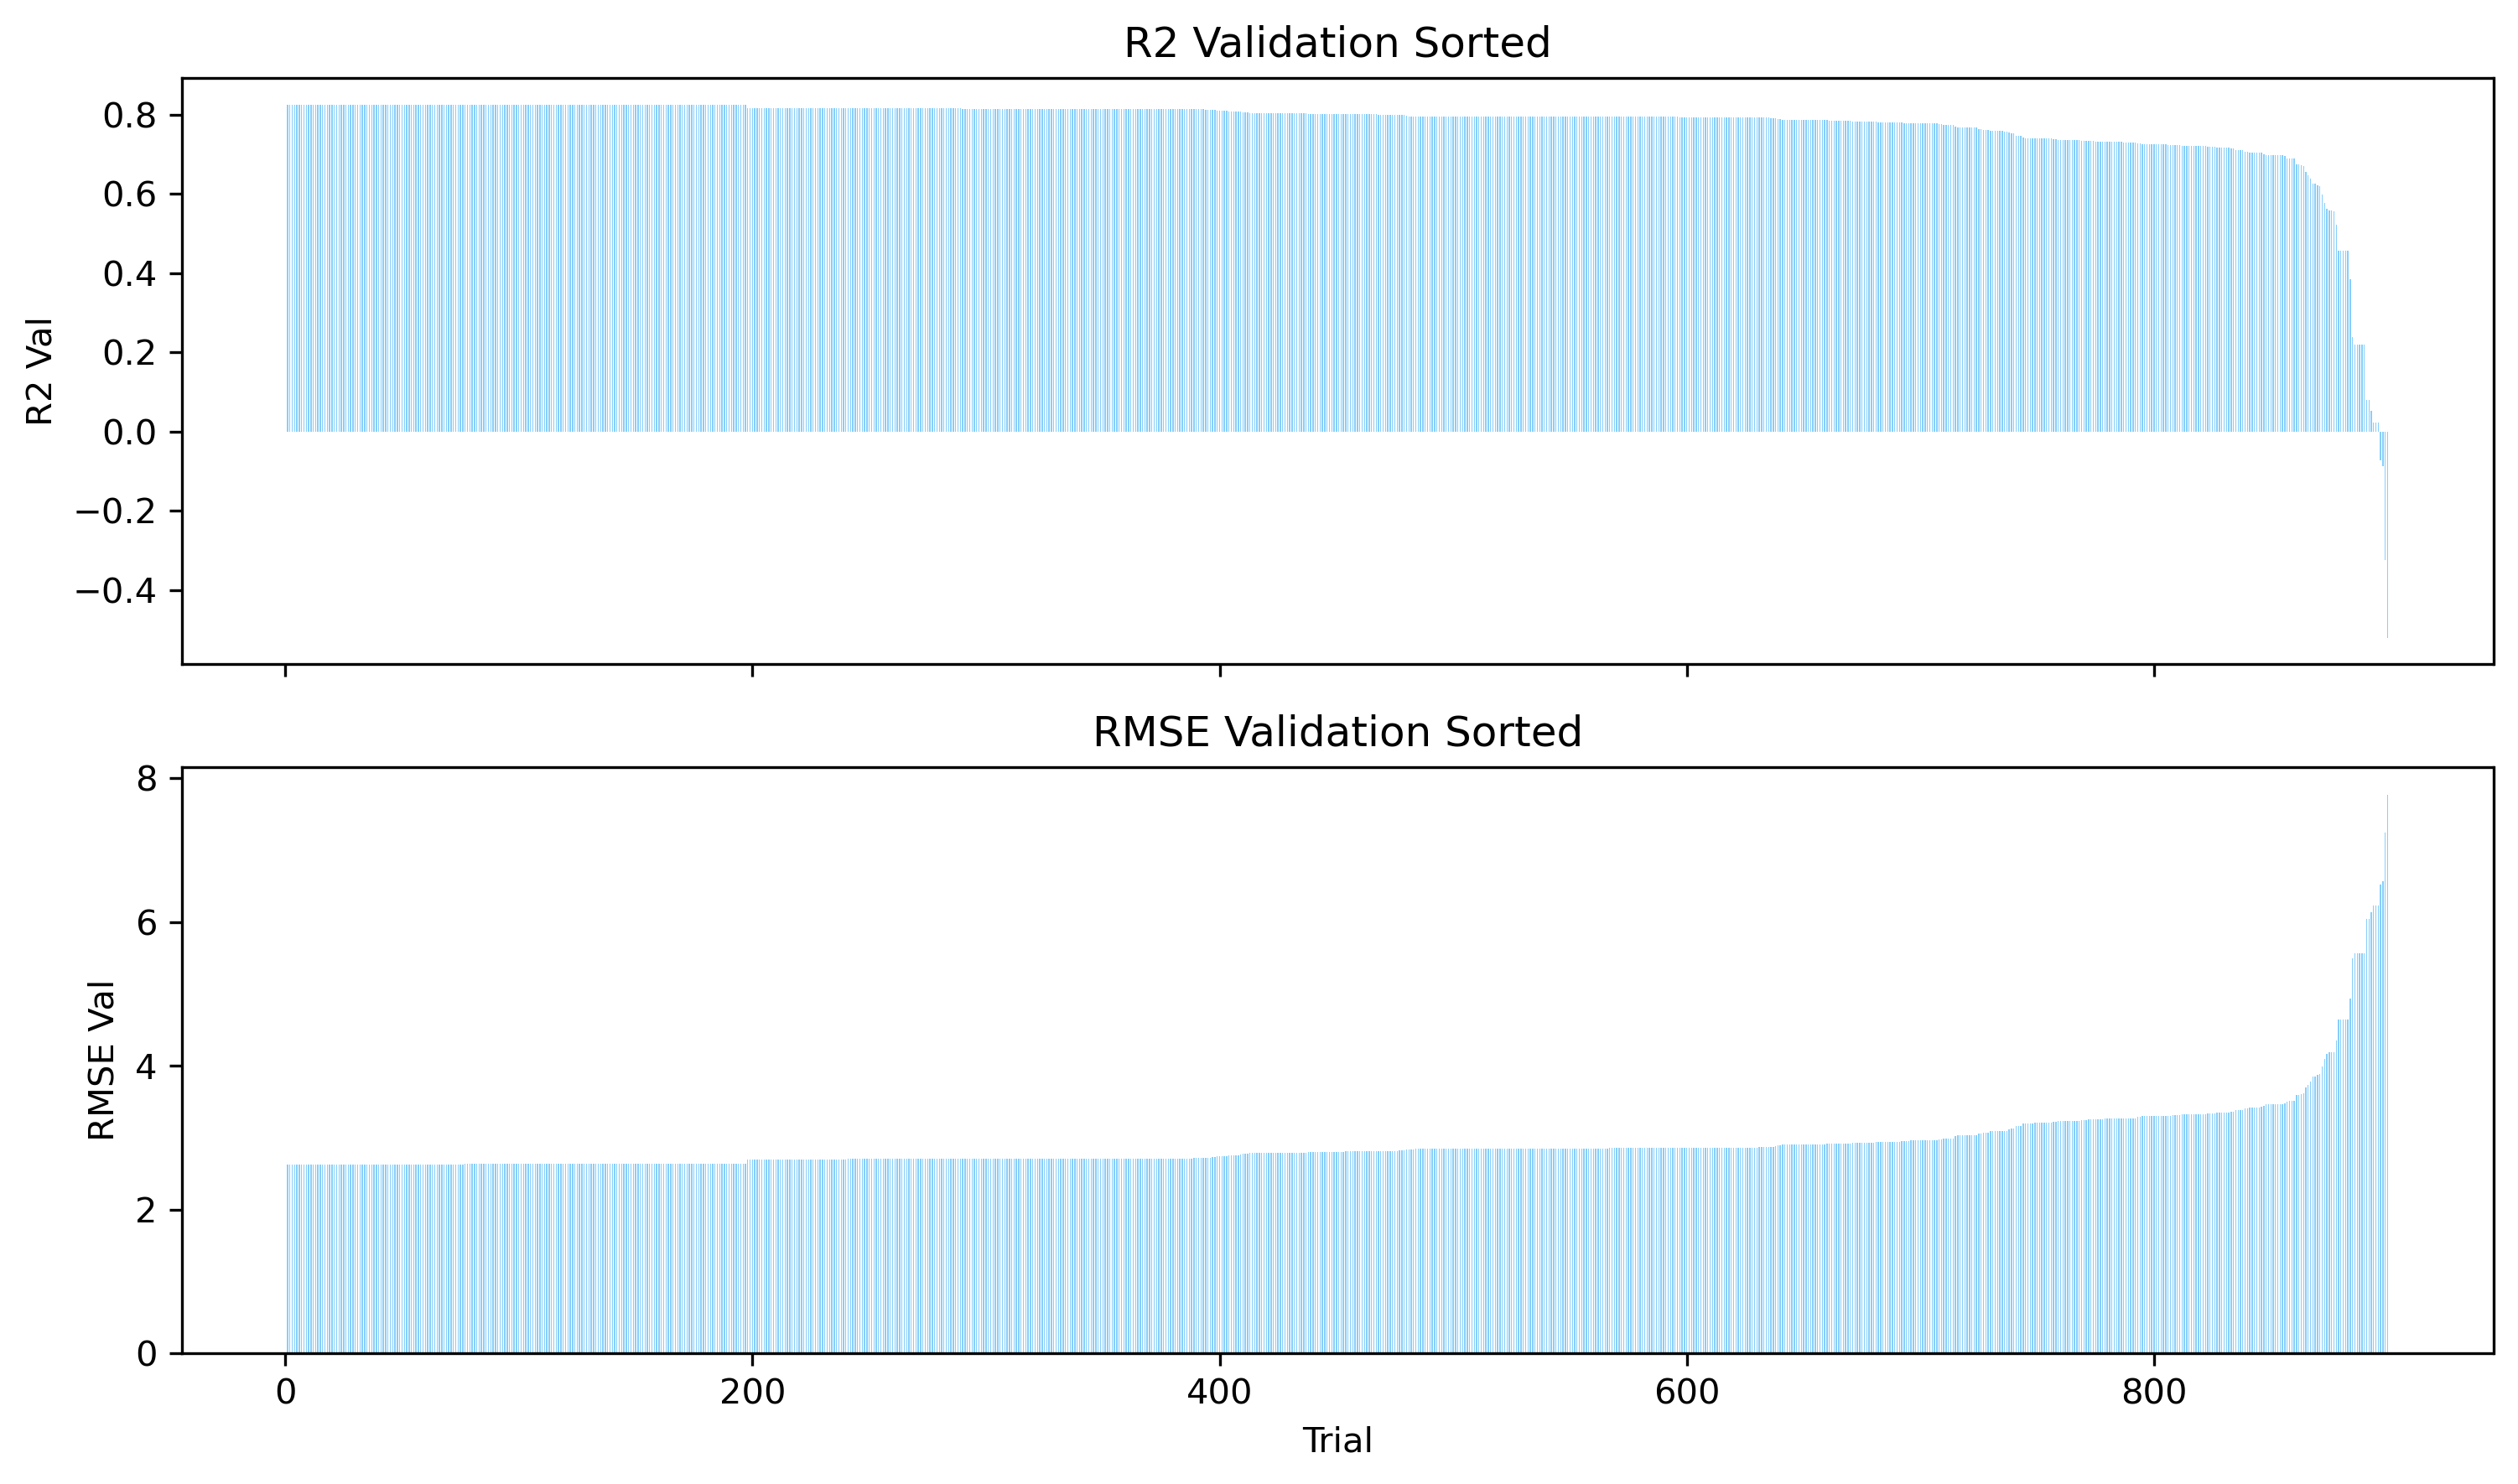

In [7]:
# Plot metrics overall
fig, axes = plot_metrics(
    df=all_runs,
    x=x_vals,
    metrics=metrics_to_plot,
    colors="lightskyblue",
    figsize=(12, 6),
    dpi=300,
    width=0.5,
)
plt.show()

### ... colored by data engineering

/var/folders/k3/lydcv_vx7cb6tzmkf7k8xvsw0000gp/T/ipykernel_63230/3548088516.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap_name, len(unique_vals))


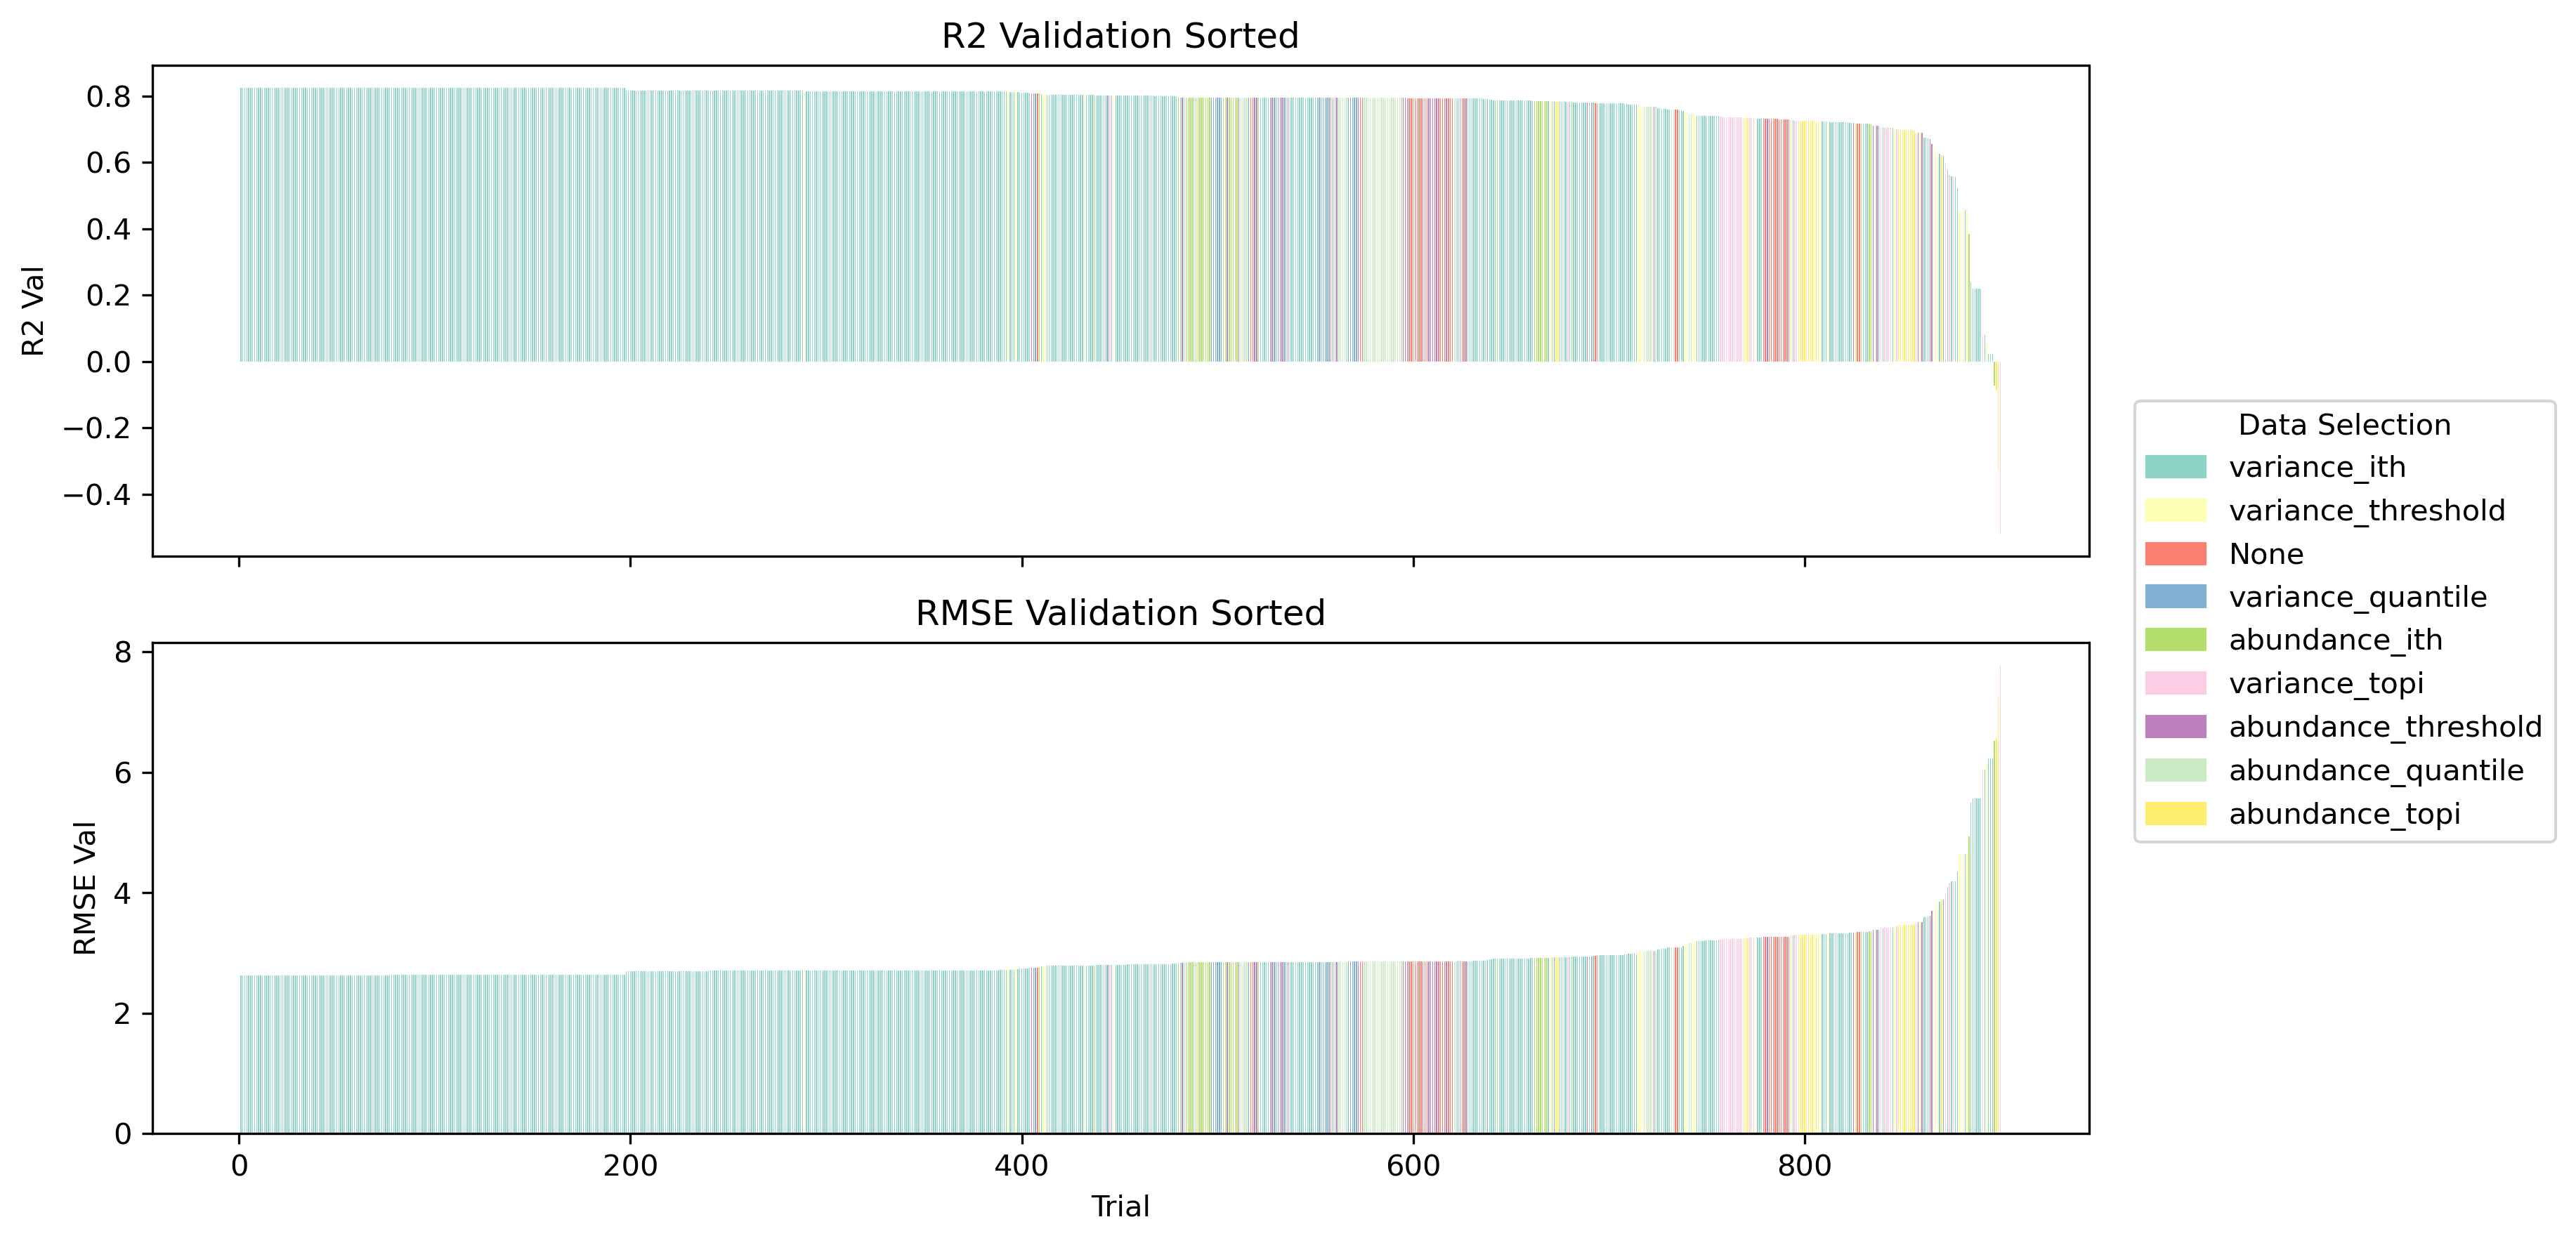

/var/folders/k3/lydcv_vx7cb6tzmkf7k8xvsw0000gp/T/ipykernel_63230/3548088516.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap_name, len(unique_vals))


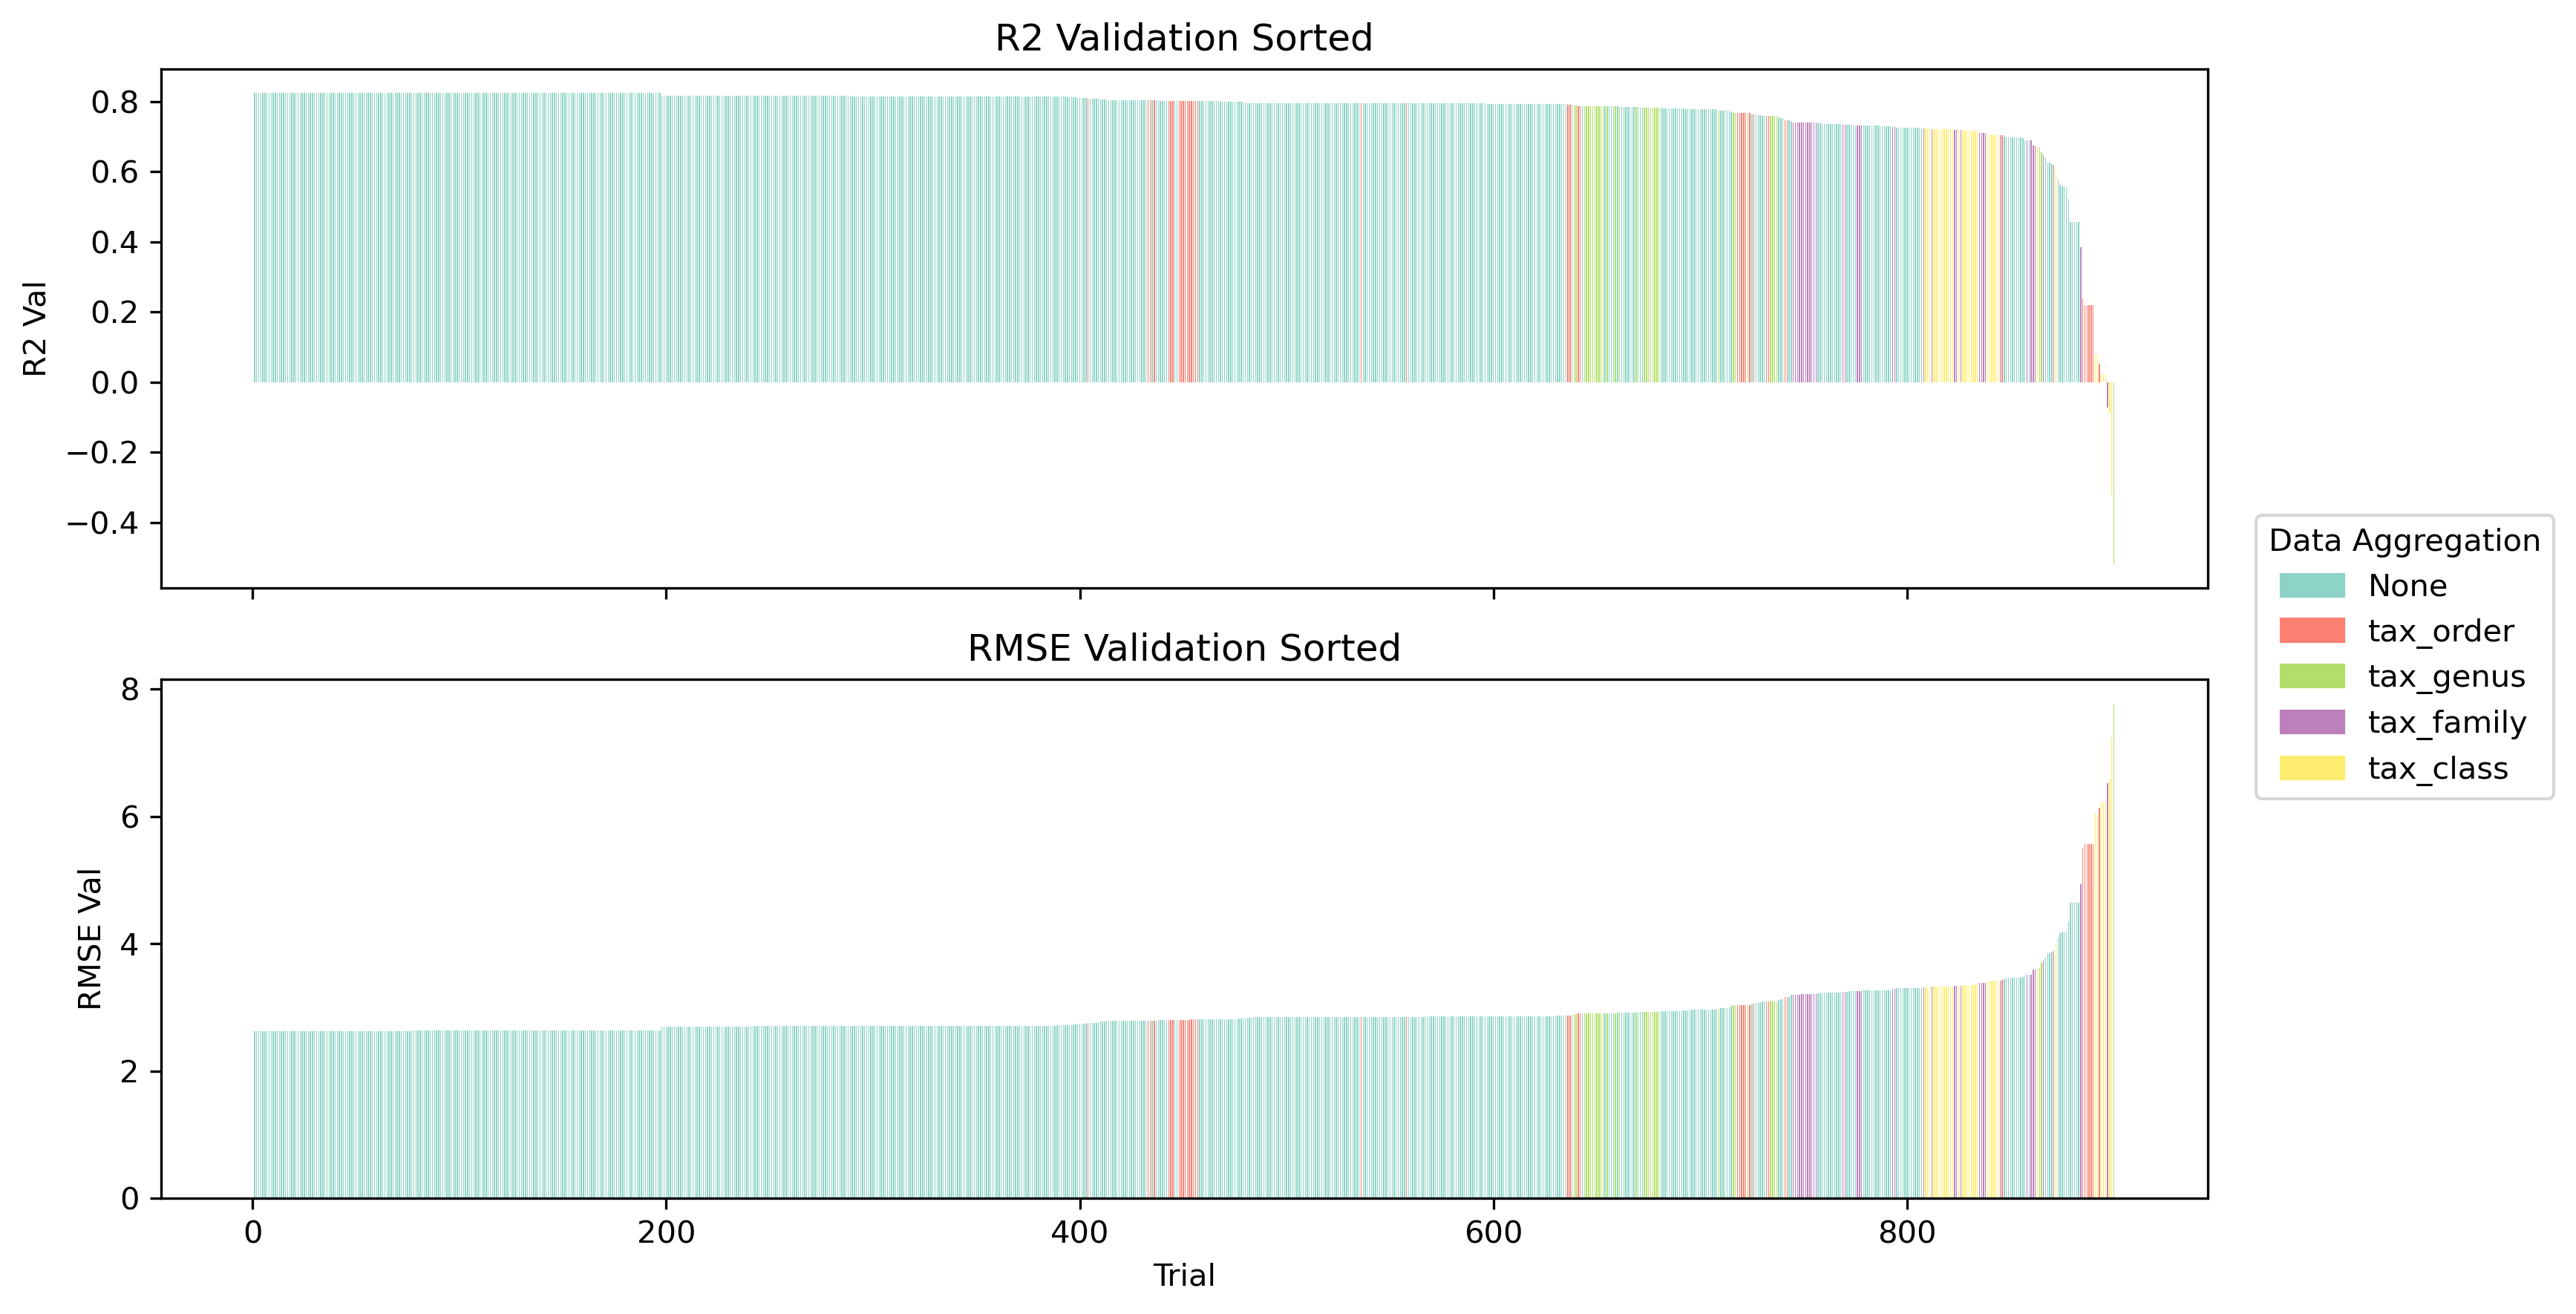

/var/folders/k3/lydcv_vx7cb6tzmkf7k8xvsw0000gp/T/ipykernel_63230/3548088516.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap_name, len(unique_vals))


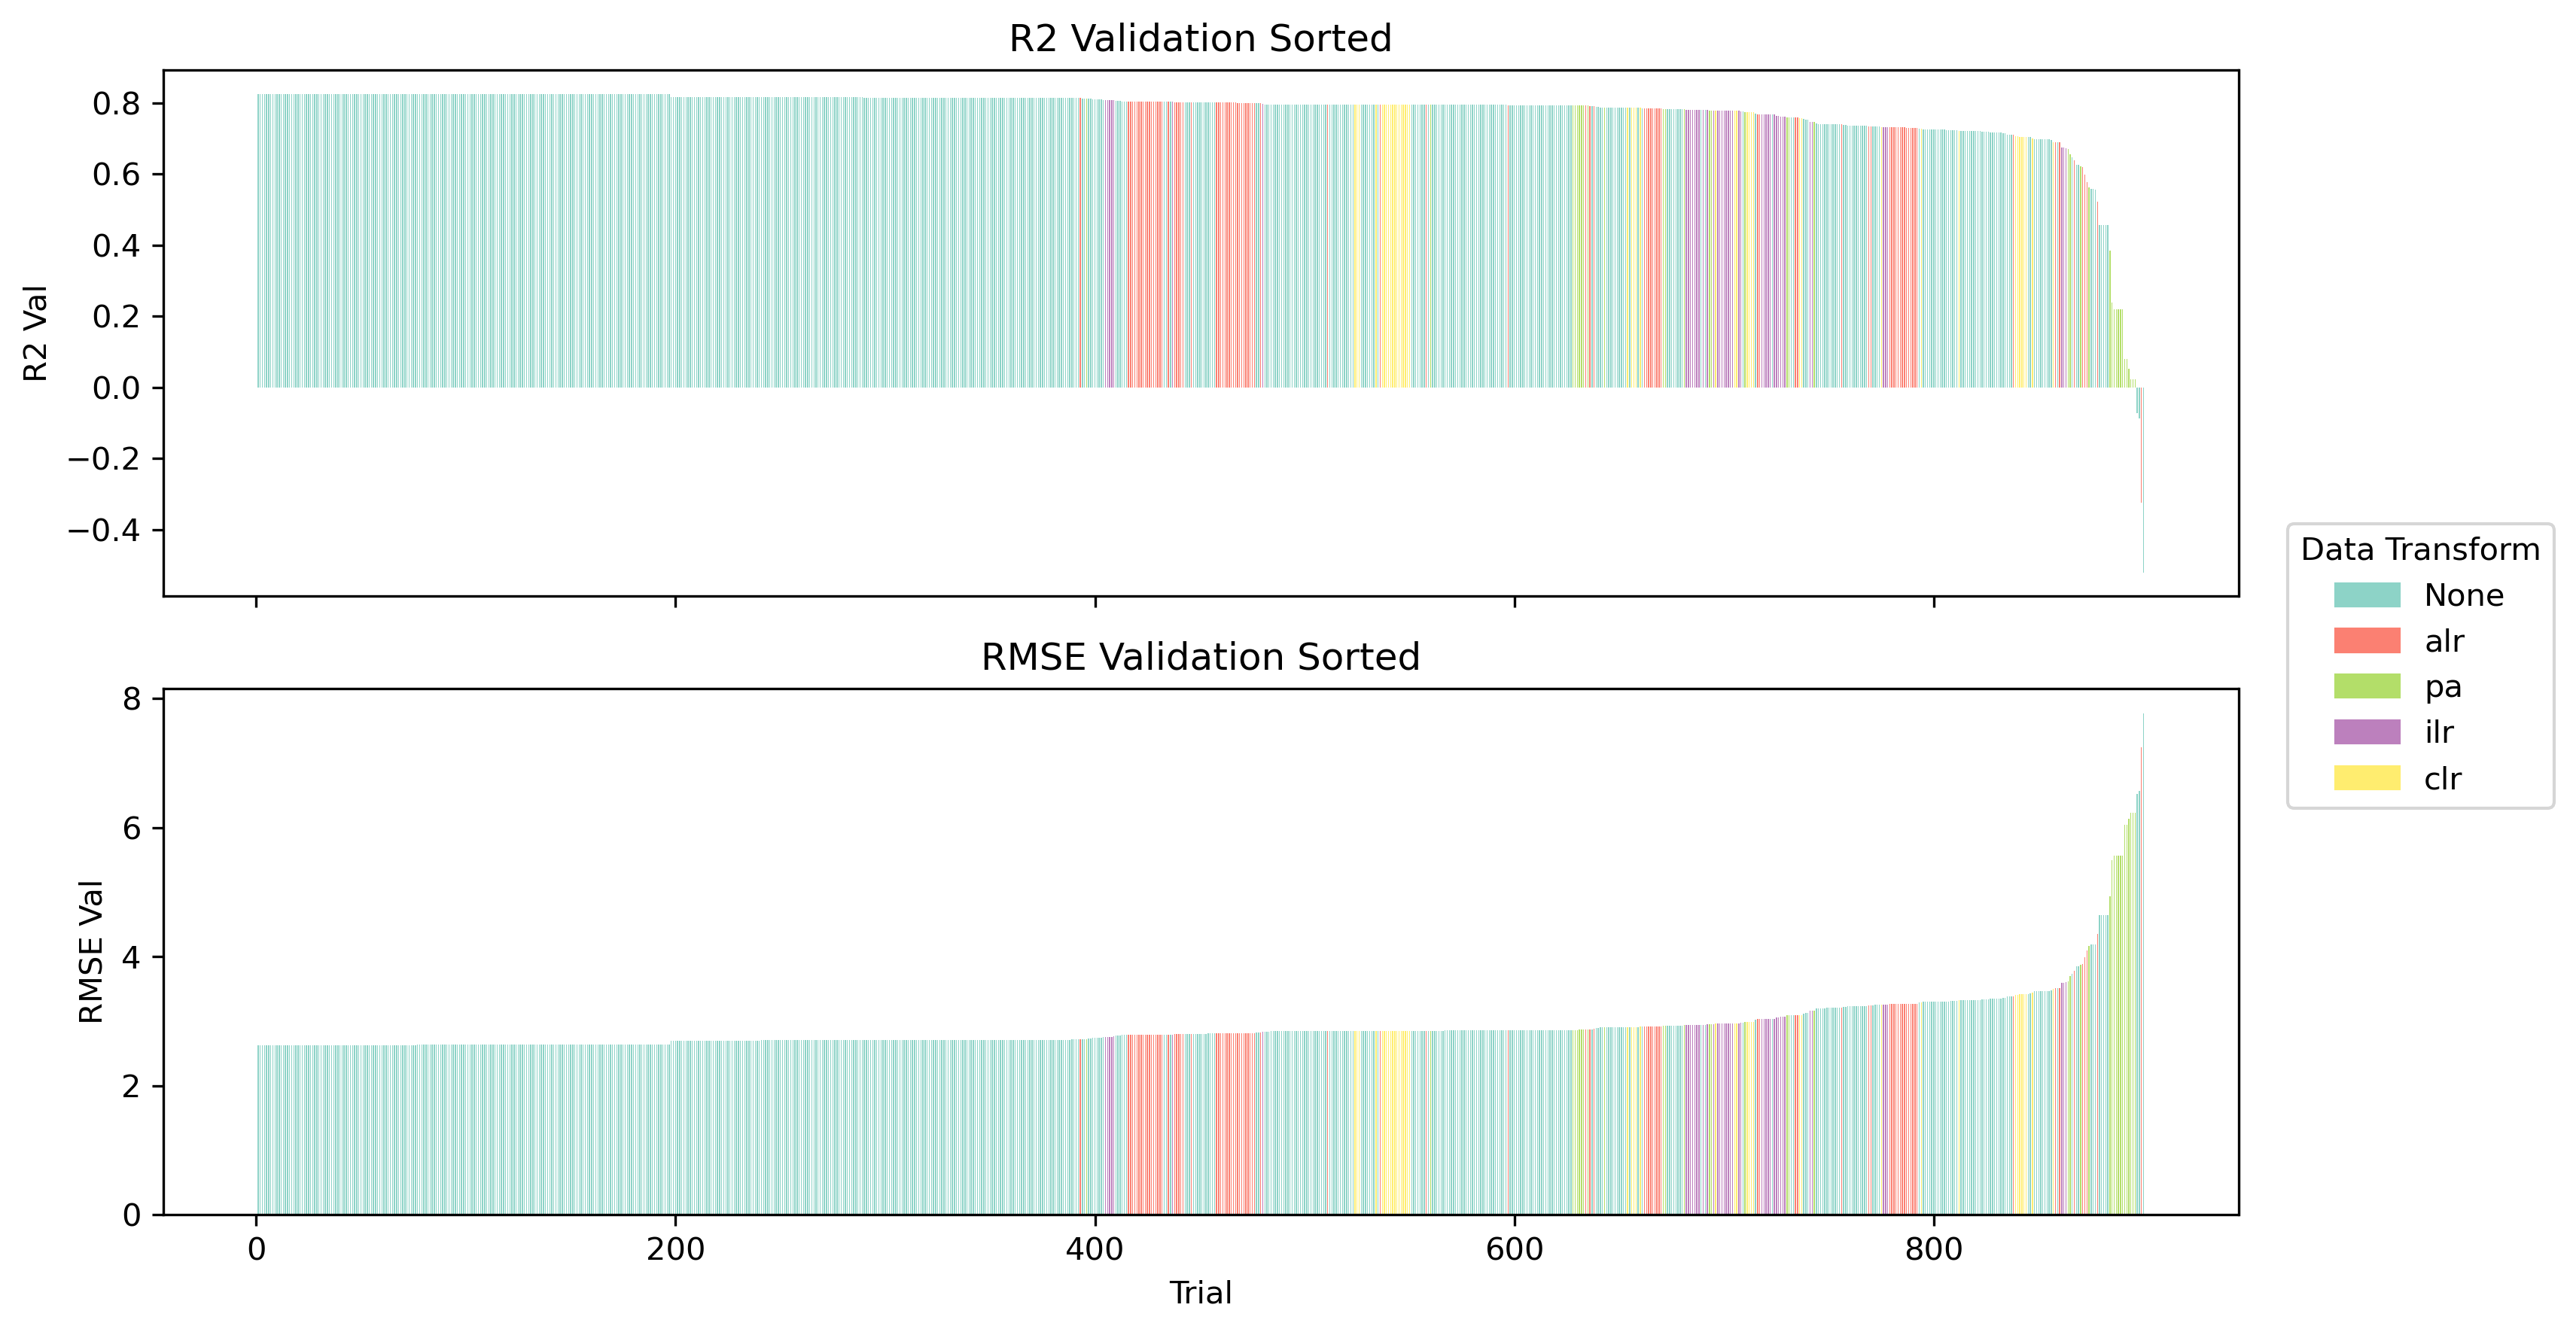

In [8]:
dic_data_engineering = {
    "Data Selection": "params.data_selection",
    "Data Aggregation": "params.data_aggregation",
    "Data Transform": "params.data_transform",
}

for name, col in dic_data_engineering.items():
    # create color map based on col
    colors, color_map = create_color_map(all_runs, col)

    fig, axes = plot_metrics(
        df=all_runs,
        x=x_vals,
        metrics=metrics_to_plot,
        colors=colors,
        figsize=(12, 6),
        dpi=300,
        width=0.5,
    )
    add_legend(fig, color_map, title=name)
    plt.show()

### ... in top 250 trials what `data_selection_i` value was used?

/var/folders/k3/lydcv_vx7cb6tzmkf7k8xvsw0000gp/T/ipykernel_63230/3548088516.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap_name, len(unique_vals))


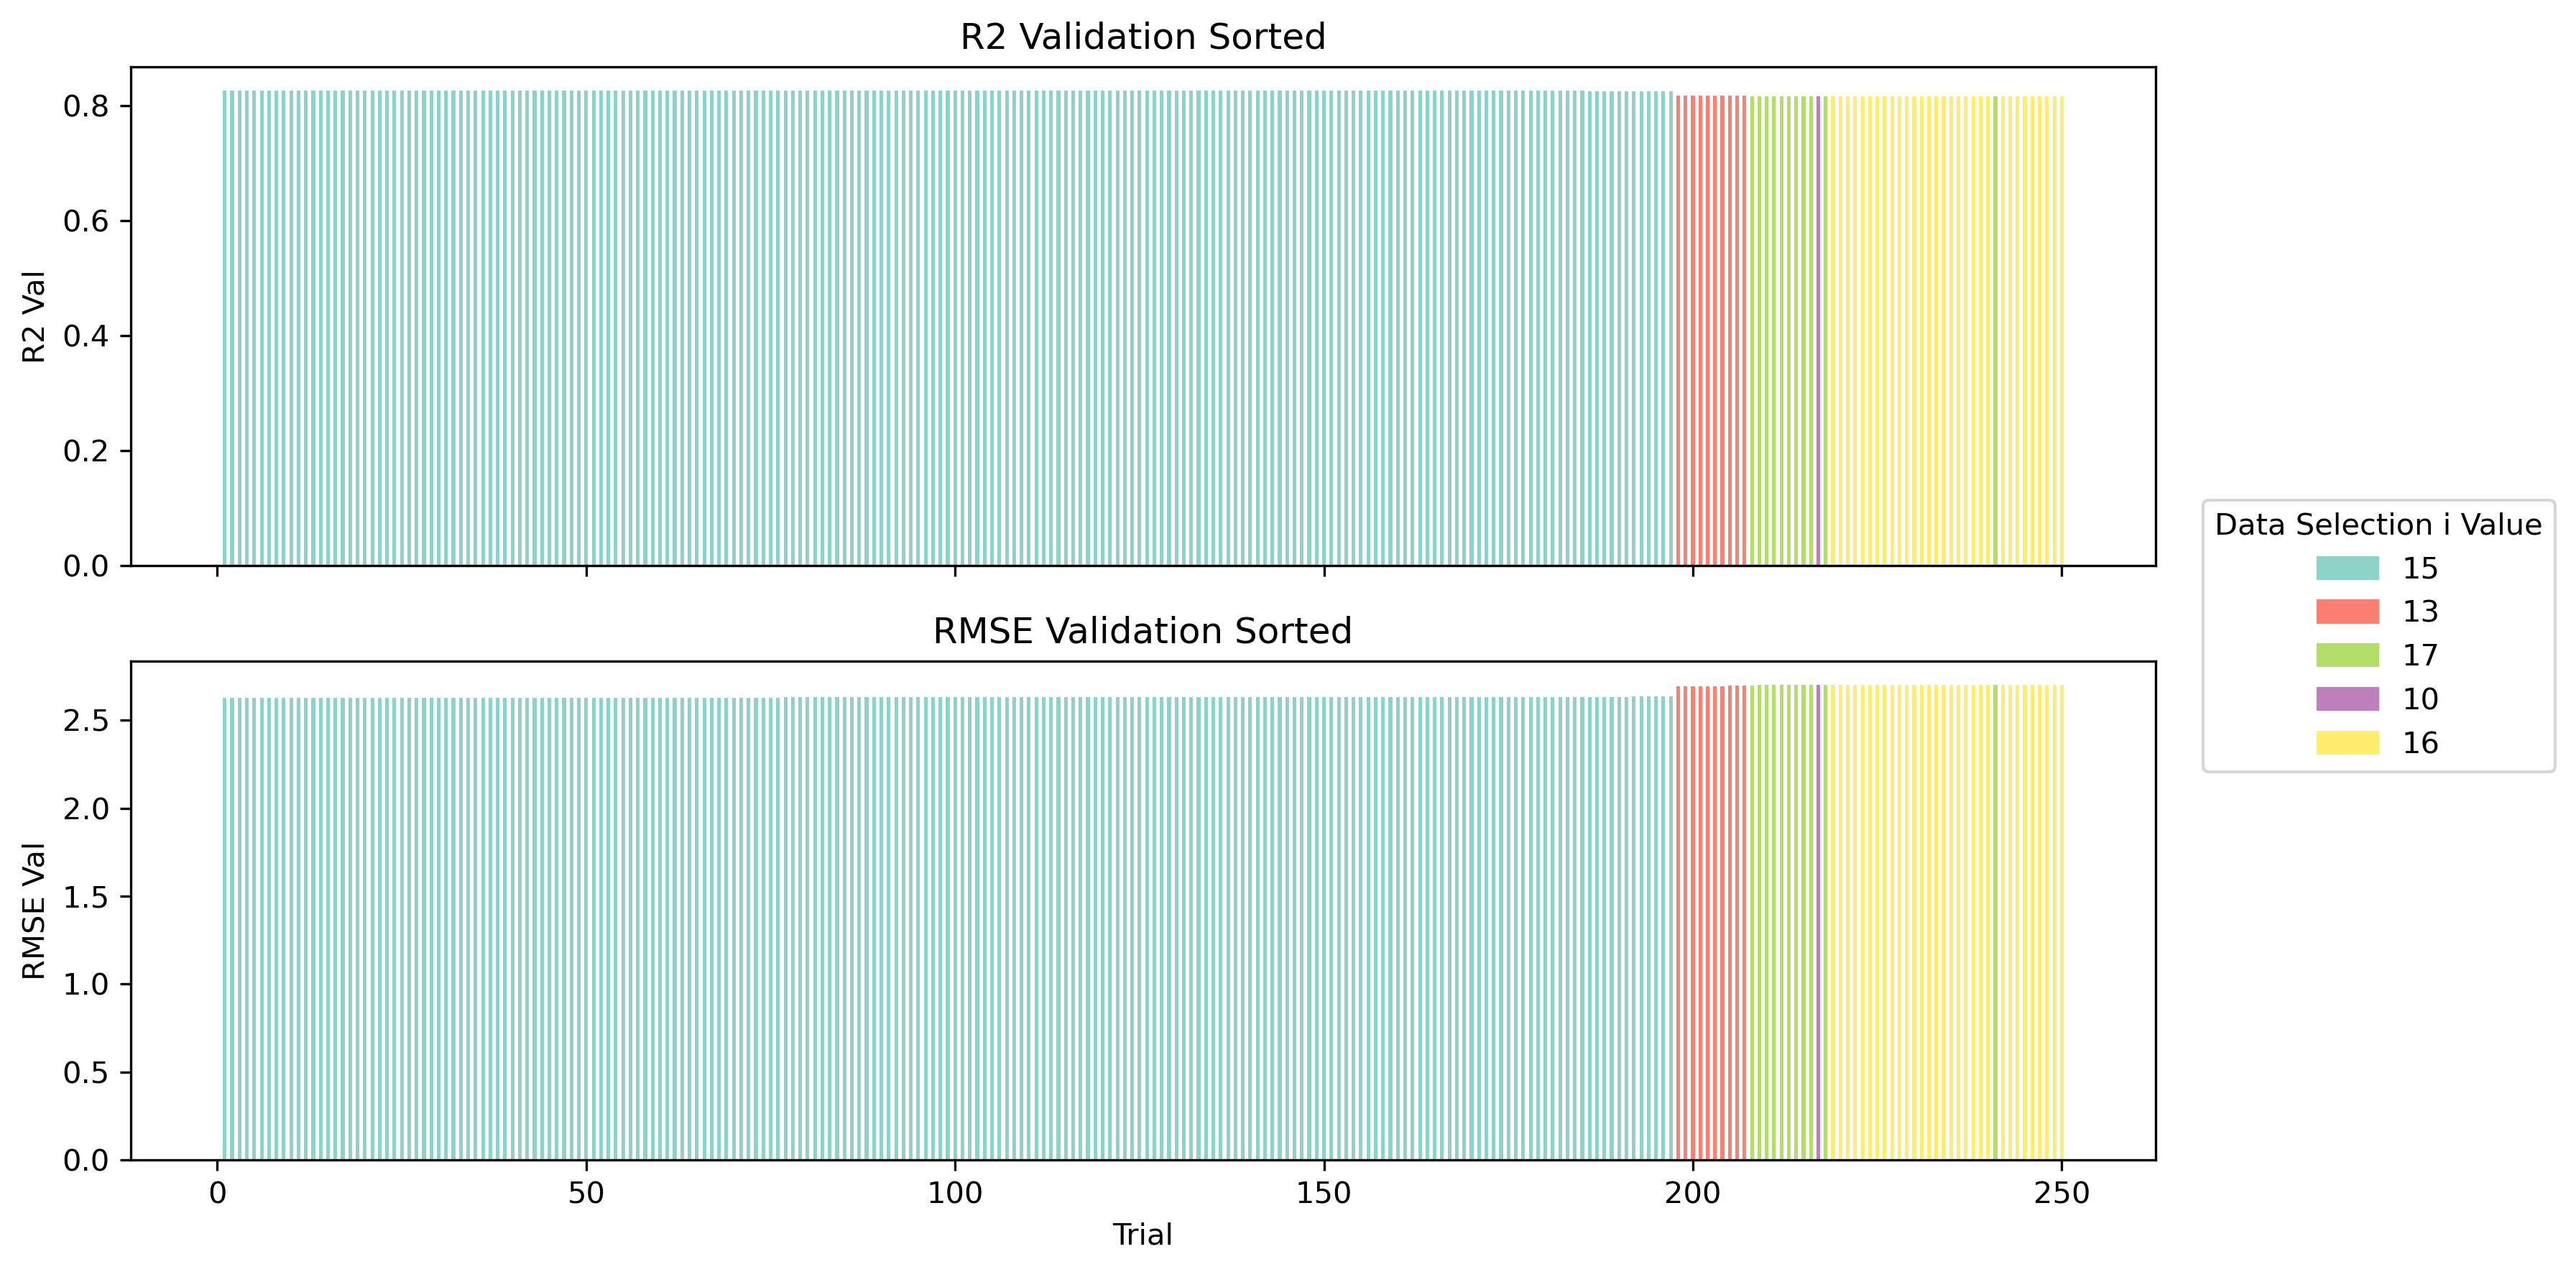

In [9]:
col = "params.data_selection_i"

top_200_runs = all_runs.iloc[:250, :]
x_vals = [x + 1 for x in top_200_runs.index.tolist()]
# create color map based on col
colors, color_map = create_color_map(top_200_runs, col)

fig, axes = plot_metrics(
    df=top_200_runs,
    x=x_vals,
    metrics=metrics_to_plot,
    colors=colors,
    figsize=(12, 6),
    dpi=300,
    width=0.5,
)
add_legend(fig, color_map, title="Data Selection i Value")
plt.show()